In [29]:
%matplotlib inline

from azureml import Workspace
import pandas as pd
import numpy as np

ws = Workspace()
ds = ws.datasets['breast-cancer-data']
breast_cancer_data = ds.to_dataframe()

## Convert some columns to numeric values
cols = ['Clump_Thickness','Uniformity_Cell_Size','Uniformity_Cell_Shape','Marginal_Adhesion','Epithelial_Cell_Size','Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli','Mitoses','Class']
breast_cancer_data[cols] = breast_cancer_data[cols].apply(pd.to_numeric, args=('coerce',))

breast_cancer_data = breast_cancer_data[np.isfinite(breast_cancer_data['Bare_Nuclei'])]

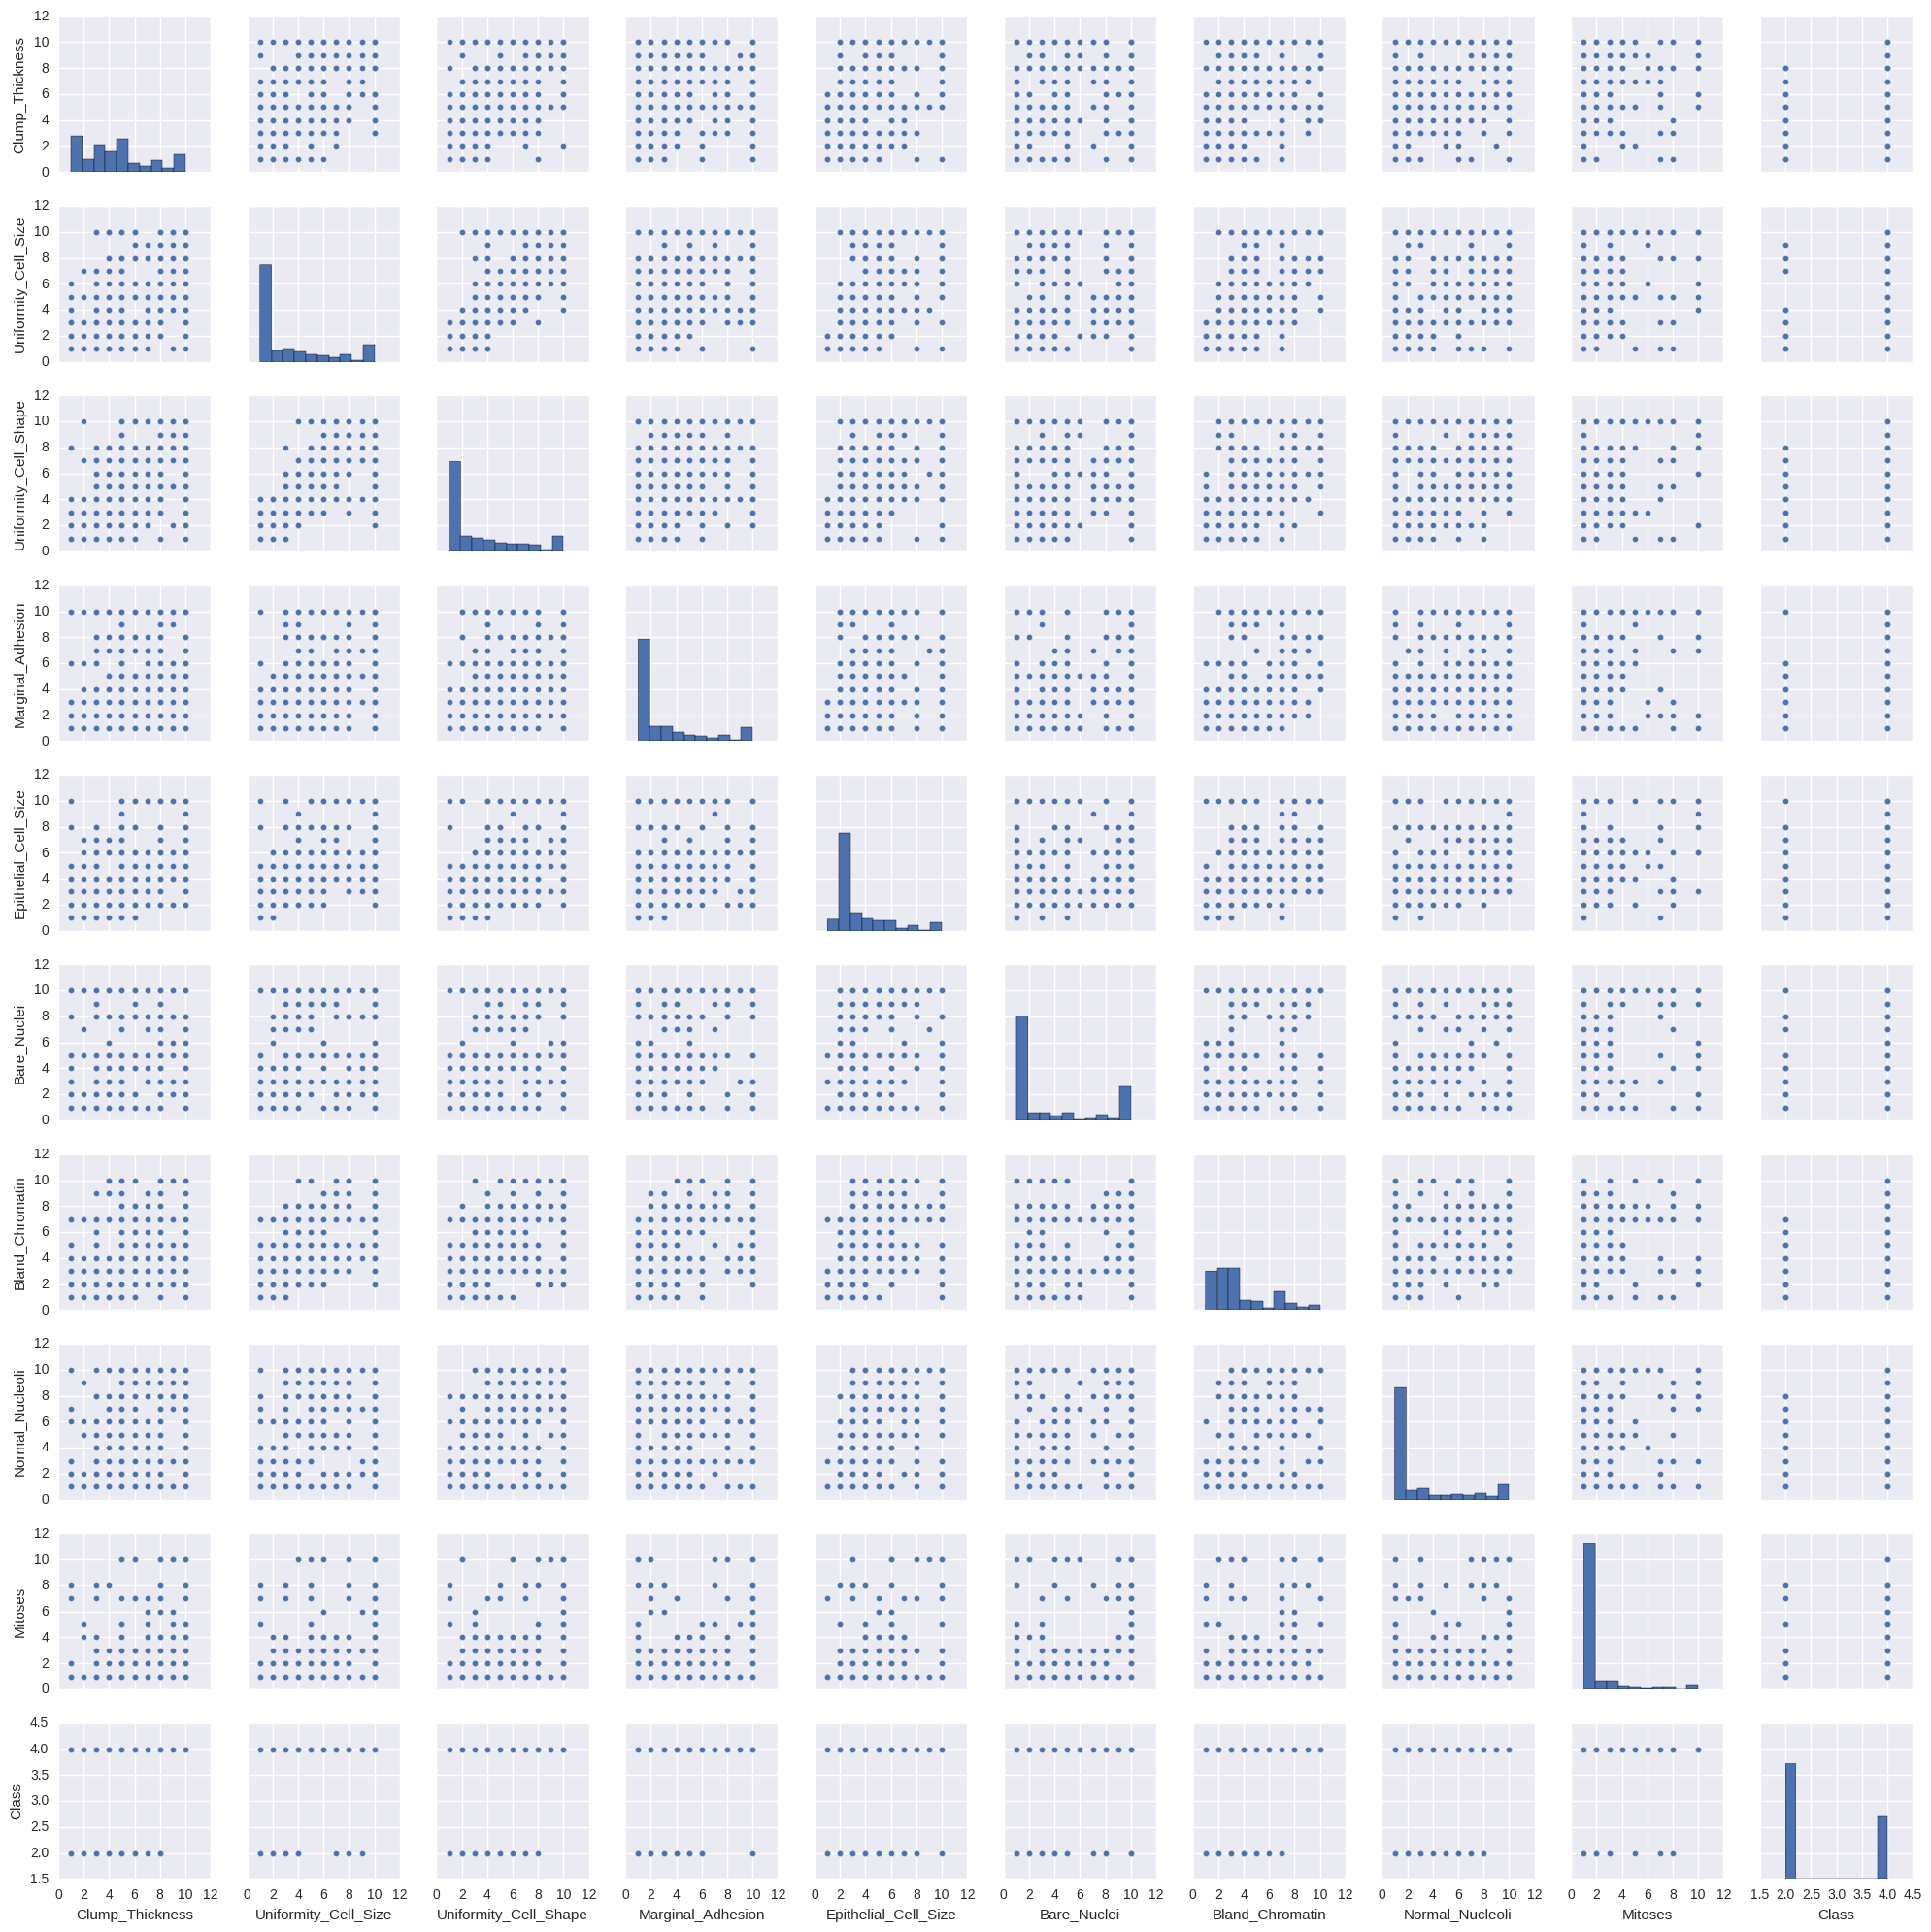

In [30]:
#Pair-wise scatter plot
import seaborn as sns
num_cols = ["Clump_Thickness","Uniformity_Cell_Size","Uniformity_Cell_Shape","Marginal_Adhesion","Epithelial_Cell_Size","Bare_Nuclei","Bland_Chromatin","Normal_Nucleoli","Mitoses","Class"]
sns.pairplot(breast_cancer_data[num_cols], size=2)

'Class'

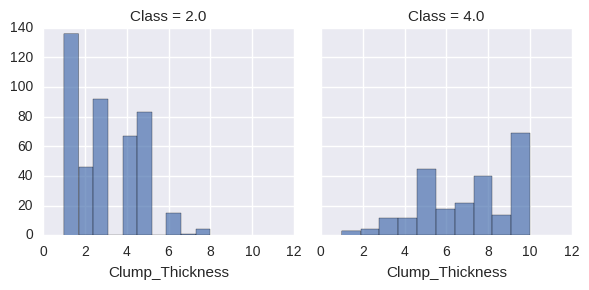

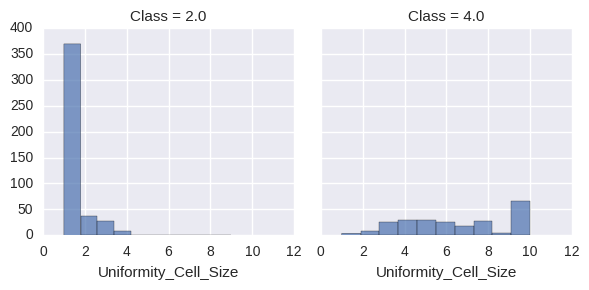

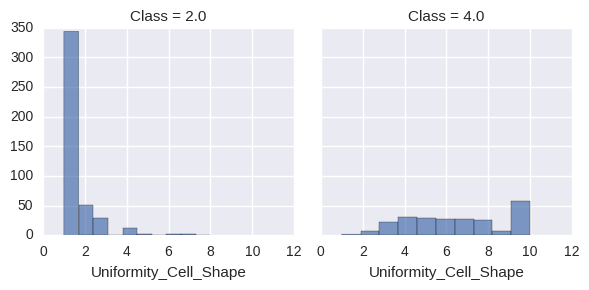

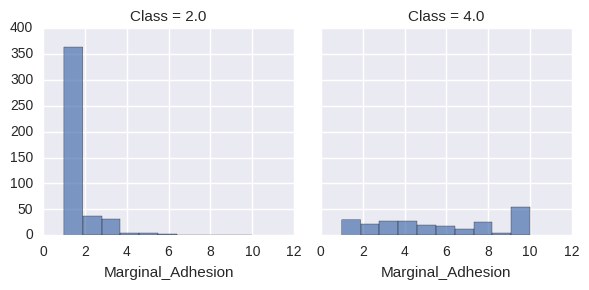

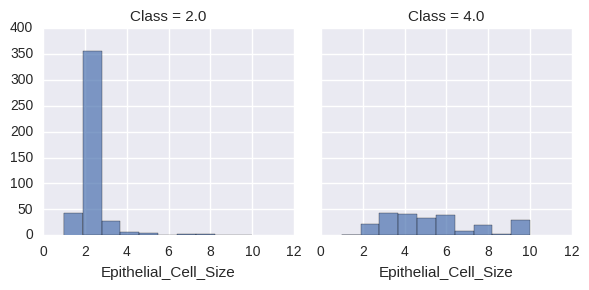

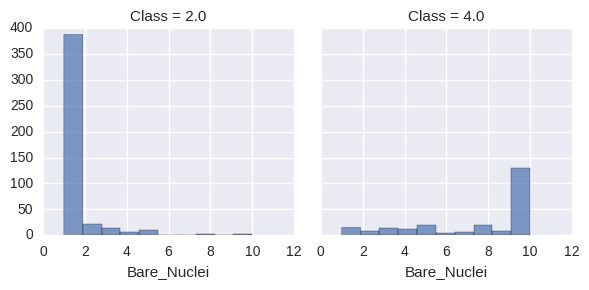

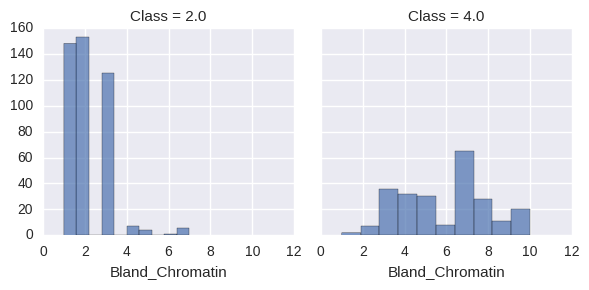

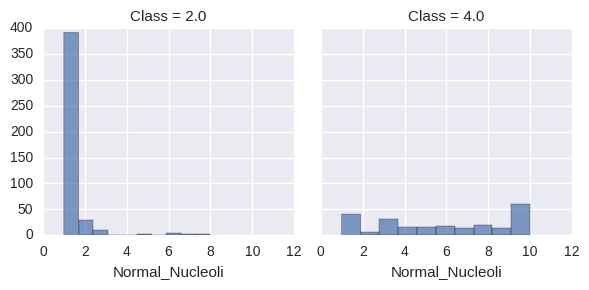

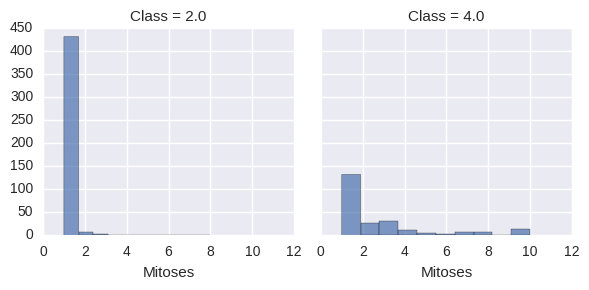

In [32]:
#Histogram

def cond_hists(df, plot_cols, grid_col):
    import matplotlib.pyplot as plt
    import seaborn as sns
    ## Loop over the list of columns
    for col in plot_cols:
        grid1 = sns.FacetGrid(df, col=grid_col)
        grid1.map(plt.hist, col, alpha=.7)
    return grid_col

## Define columns for making a conditioned histogram
plot_cols2 = ['Clump_Thickness','Uniformity_Cell_Size','Uniformity_Cell_Shape','Marginal_Adhesion','Epithelial_Cell_Size','Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli','Mitoses']

cond_hists(breast_cancer_data, plot_cols2, 'Class')

'Class'

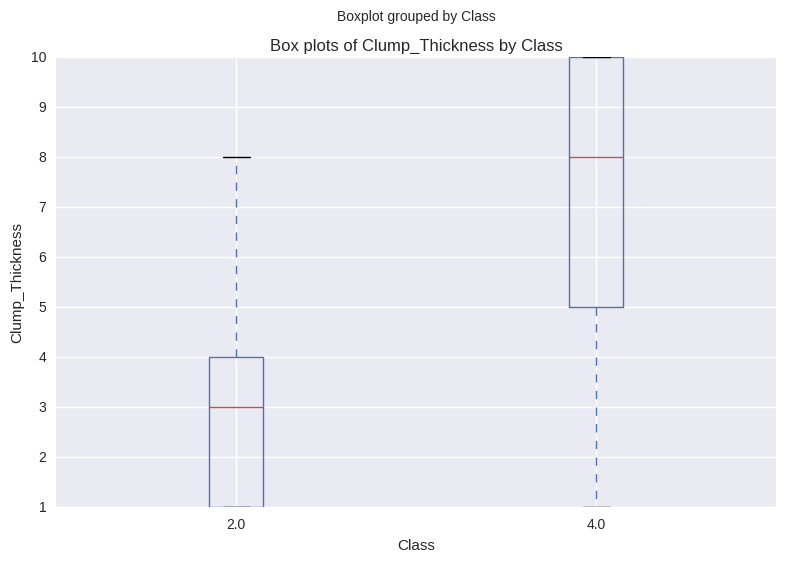

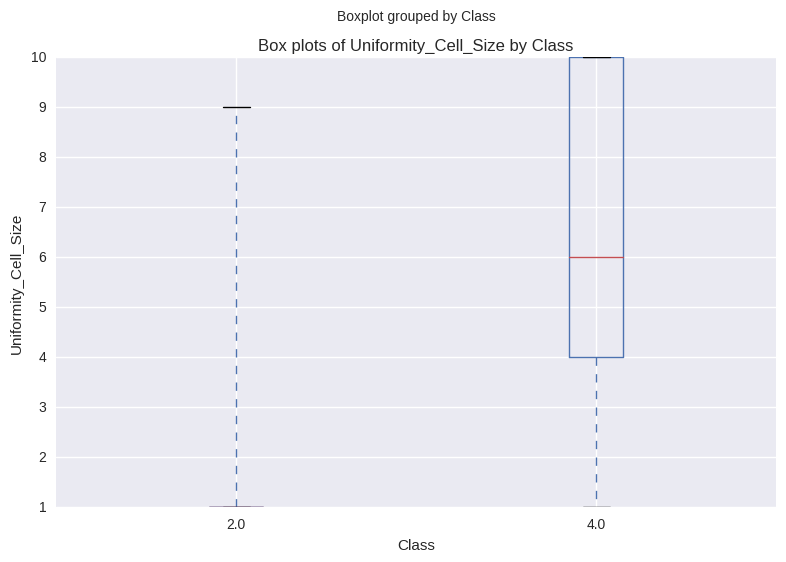

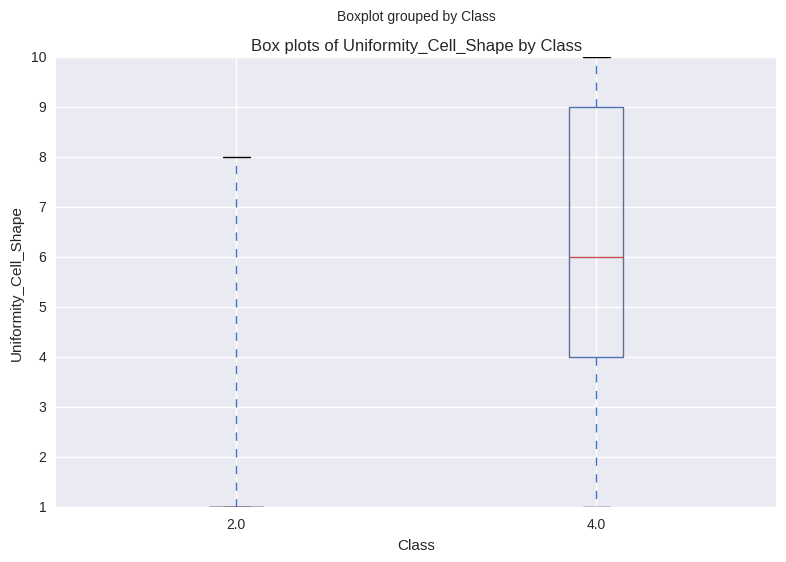

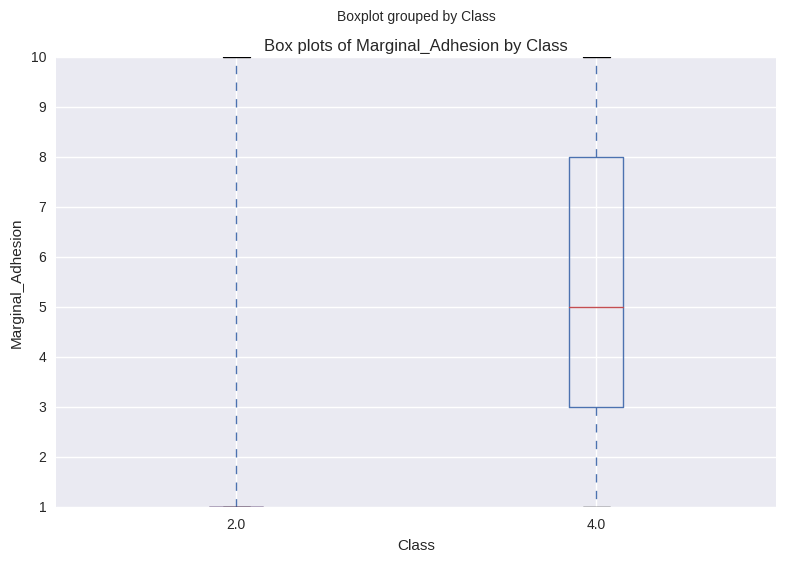

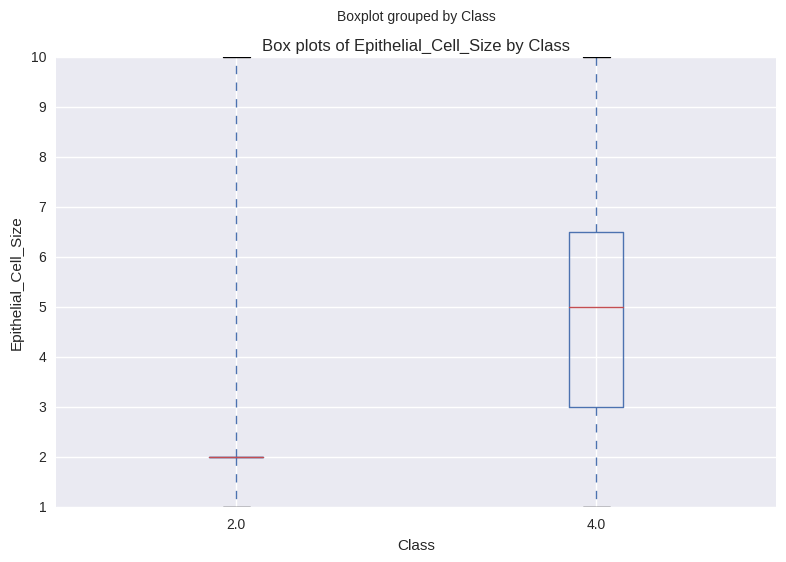

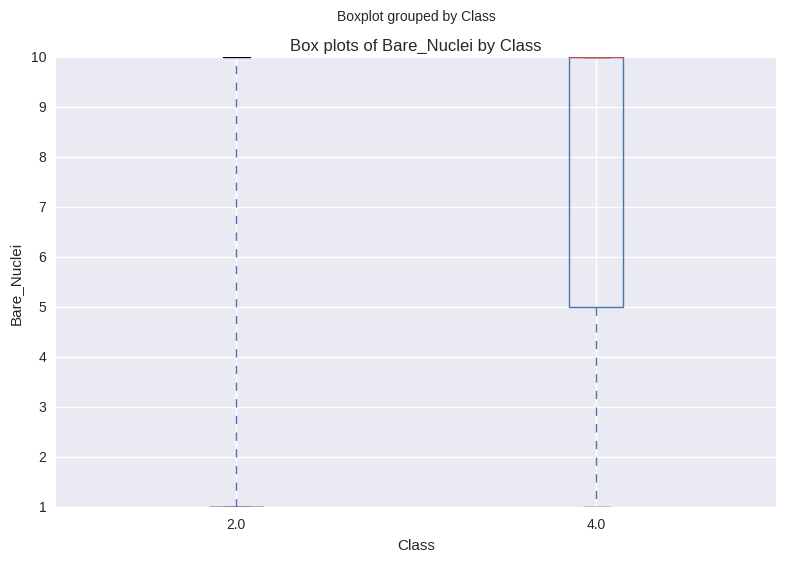

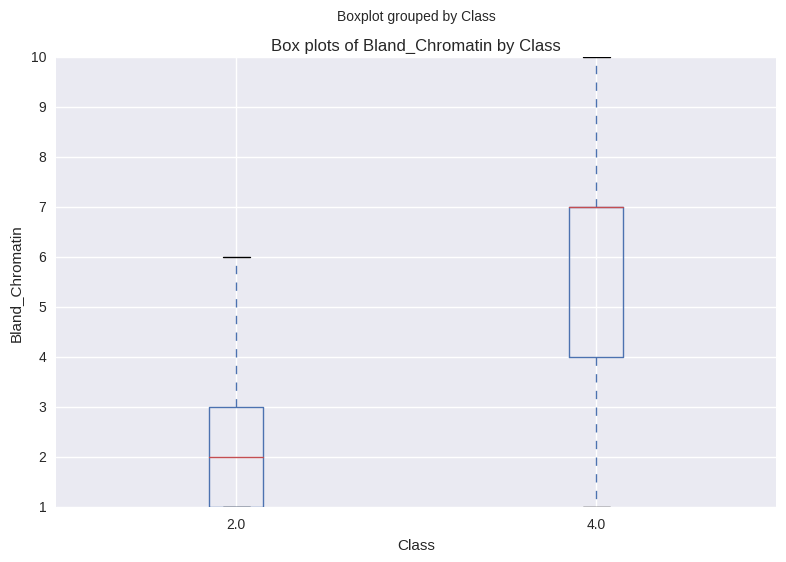

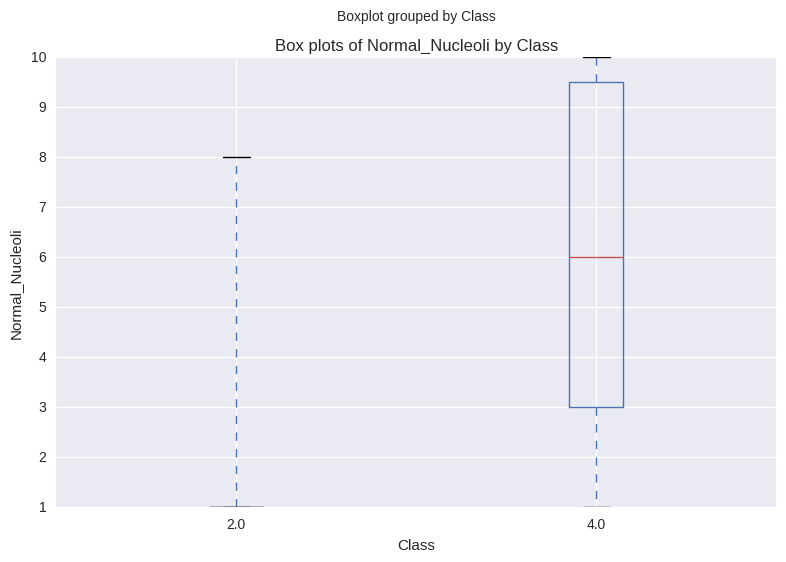

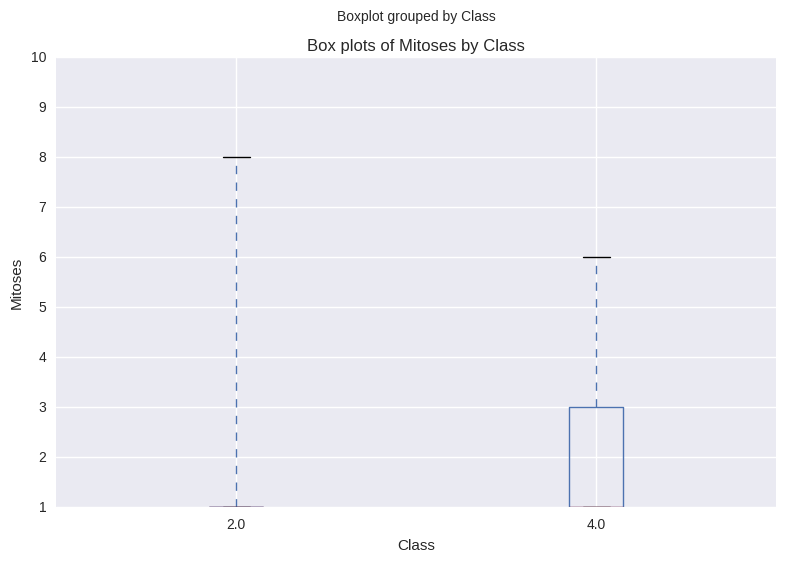

In [33]:
## Create boxplots of data
def auto_boxplot(df, plot_cols, by):
    import matplotlib.pyplot as plt
    for col in plot_cols:
        fig = plt.figure(figsize=(9, 6))
        ax = fig.gca()
        df.boxplot(column = col, by = by, ax = ax)
        ax.set_title('Box plots of ' + col + ' by ' + by)
        ax.set_ylabel(col)
    return by 

auto_boxplot(breast_cancer_data, plot_cols2, "Class")

['Uniformity_Cell_Size',
 'Uniformity_Cell_Shape',
 'Marginal_Adhesion',
 'Epithelial_Cell_Size',
 'Bare_Nuclei',
 'Bland_Chromatin',
 'Normal_Nucleoli',
 'Mitoses']

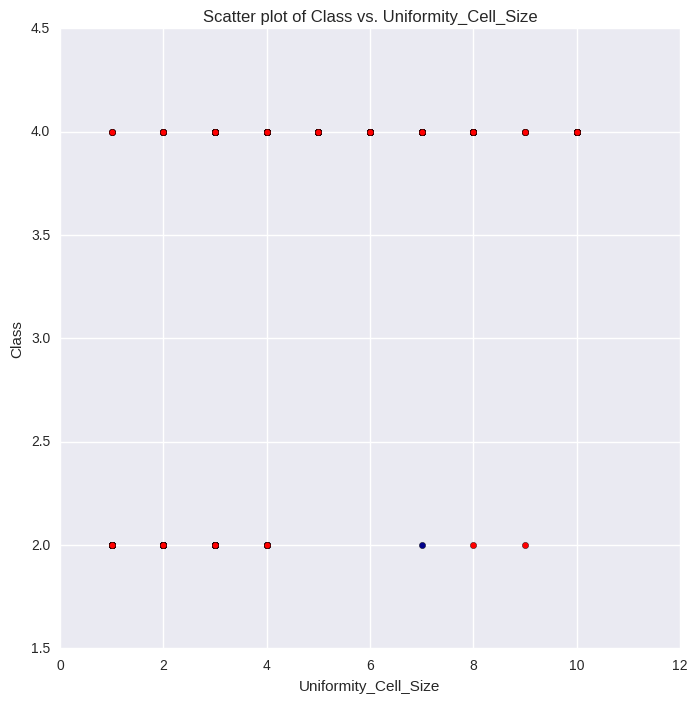

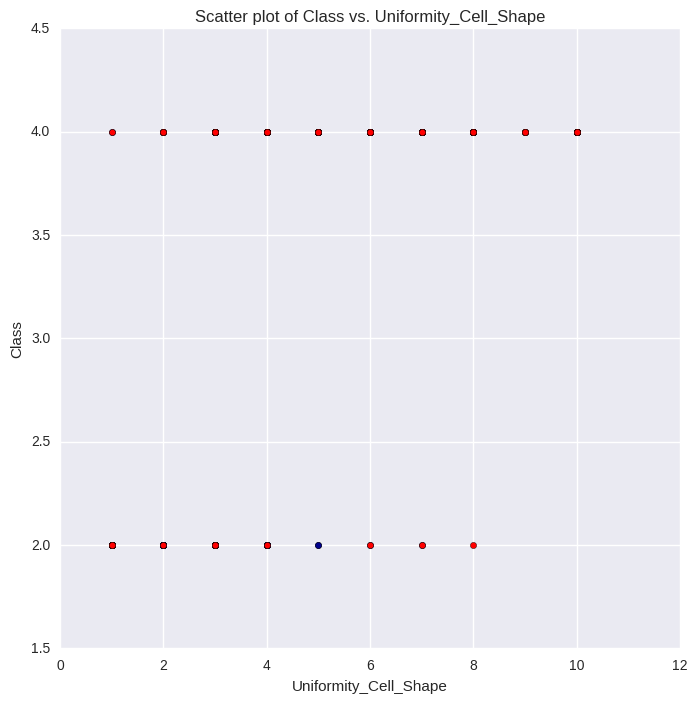

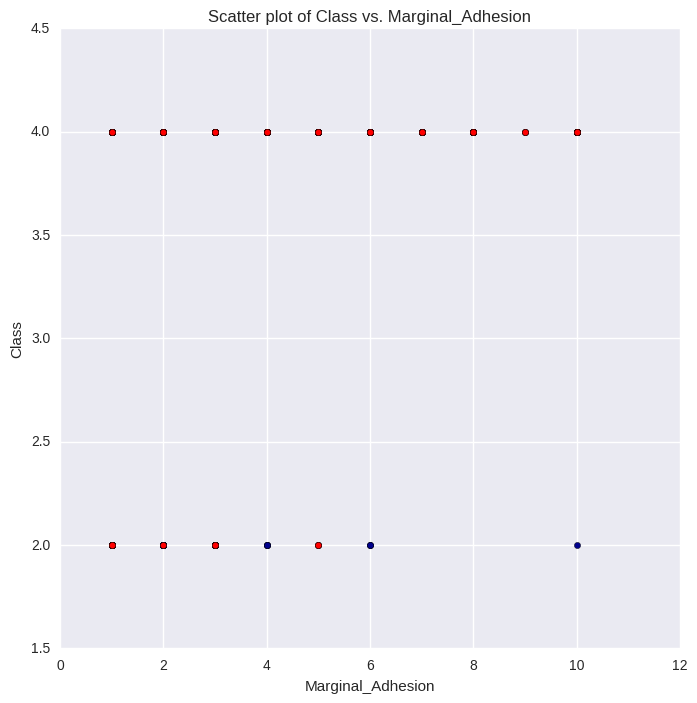

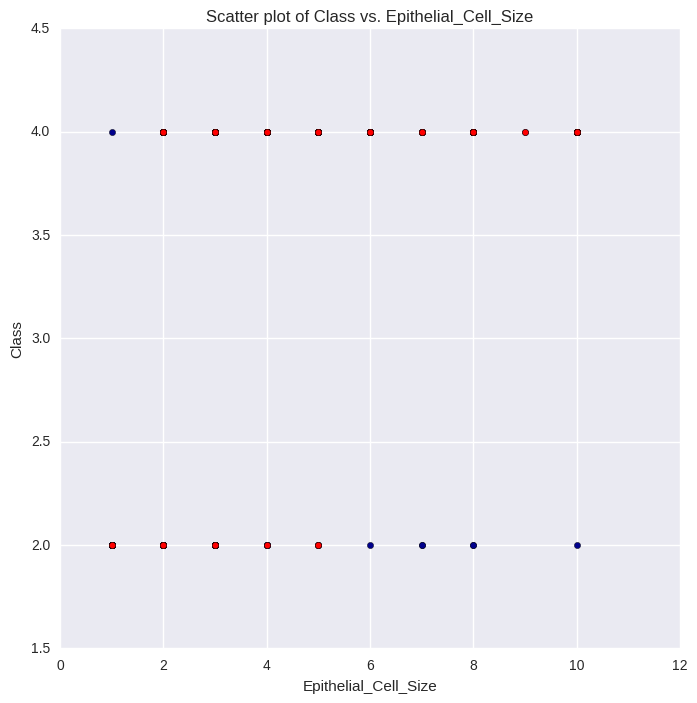

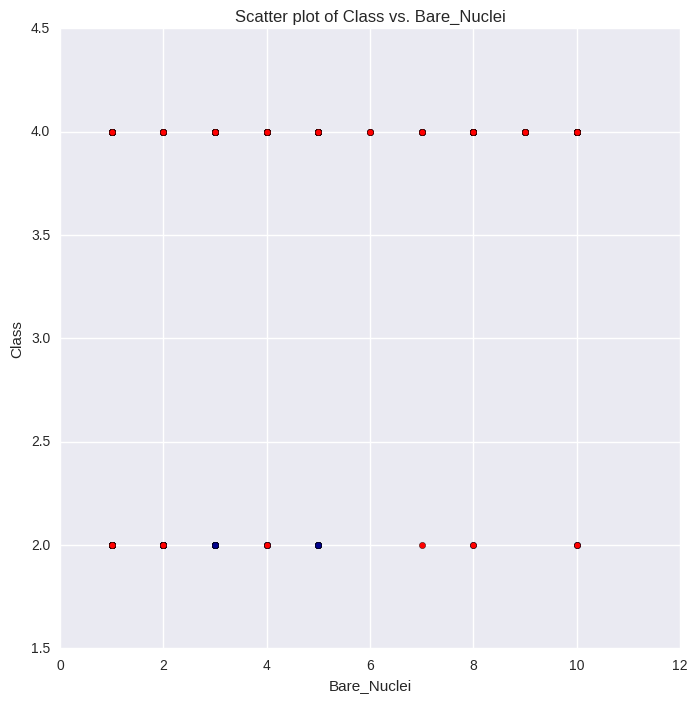

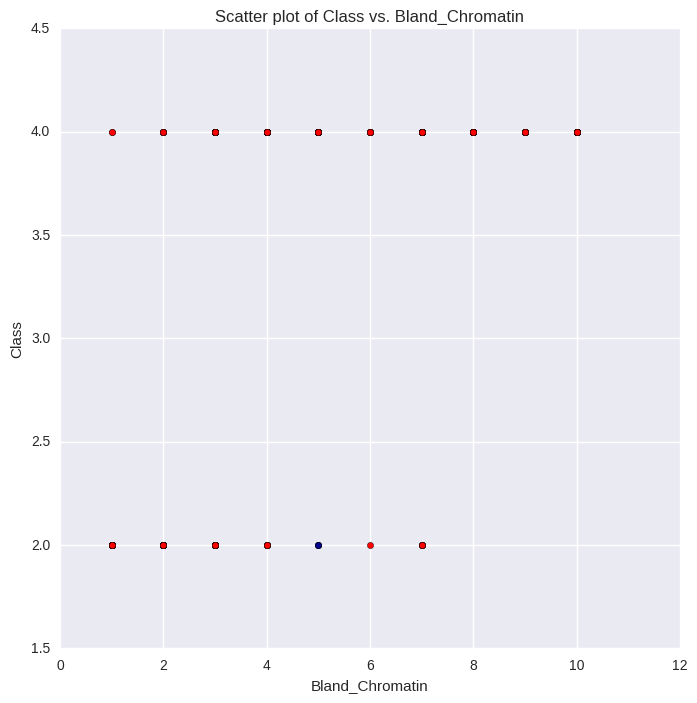

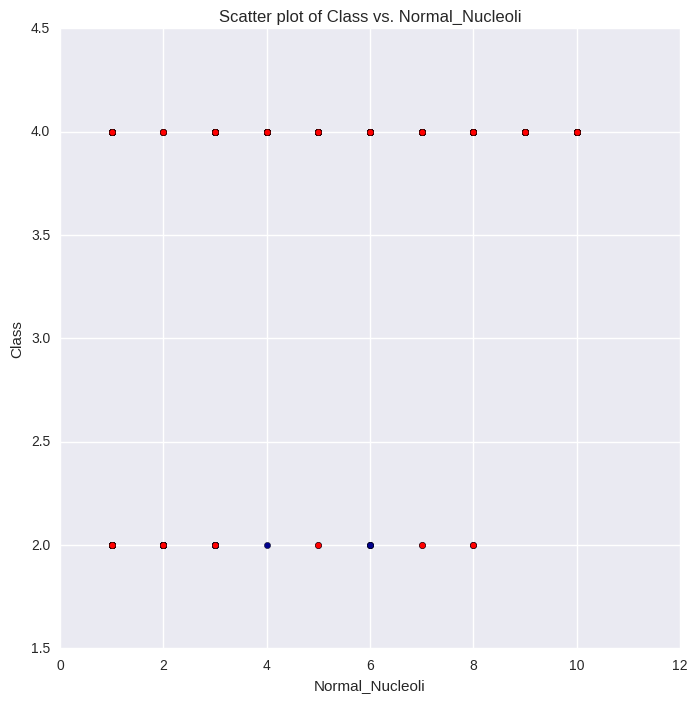

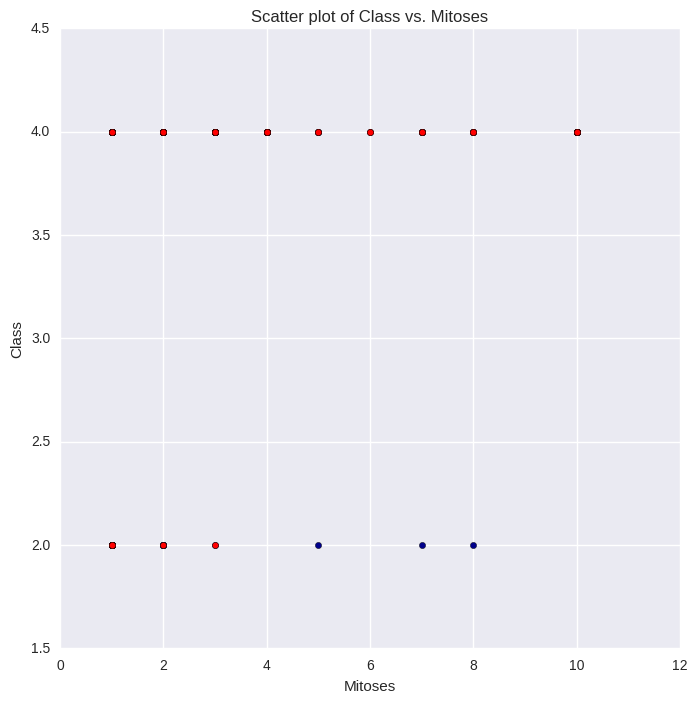

In [34]:
## Create scatter plot
def auto_scatter(df, plot_cols):
    import matplotlib.pyplot as plt
    for col in plot_cols:
        fig = plt.figure(figsize=(8, 8))
        ax = fig.gca()
        temp1 = df.ix[df['Clump_Thickness'] <= 5]       
        temp2 = df.ix[df['Clump_Thickness'] > 5]
        if temp1.shape[0] > 0:                    
            temp1.plot(kind = 'scatter', x = col, y = 'Class' , 
                           ax = ax, color = 'DarkBlue')                          
        if temp2.shape[0] > 0:                    
            temp2.plot(kind = 'scatter', x = col, y = 'Class' , 
                           ax = ax, color = 'Red') 
        ax.set_title('Scatter plot of Class vs. ' + col)
    return plot_cols

## Define columns for making scatter plots
plot_cols3 = ['Uniformity_Cell_Size','Uniformity_Cell_Shape','Marginal_Adhesion','Epithelial_Cell_Size','Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli','Mitoses']

auto_scatter(breast_cancer_data, plot_cols3)